In [ ]:
%pip install paho-mqtt

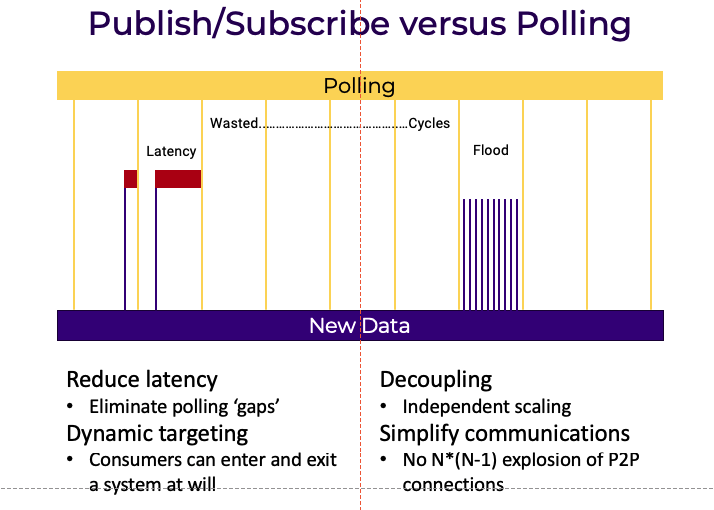


# MQTT Overview
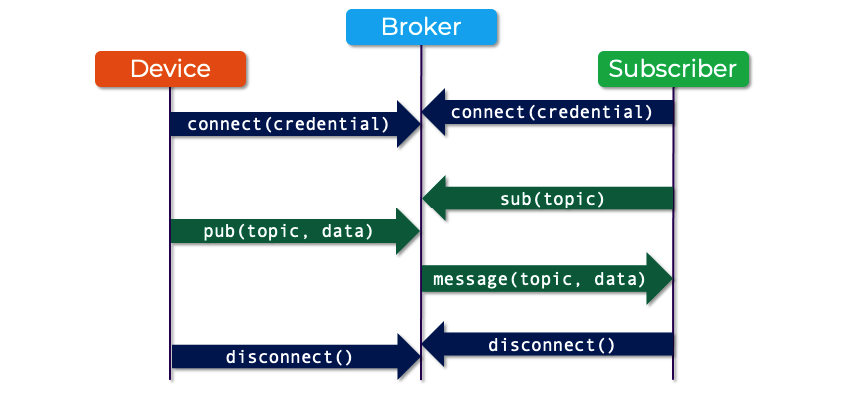

In [ ]:
import paho.mqtt.client as mqtt
from time import sleep

## Instructions

1. Change the ```DEVICE_ID``` value to reflect your assigned device ID.

In [ ]:
#Define some constants
MQTT_BROKER = "test.mosquitto.org"
MQTT_PORT = 1883
DEVICE_ID = 'KUS_TEST05' #Change this line
TEST_TOPIC='kus/test'

In [ ]:
def on_connect(client, userdata, flags, rc):
    print("Device connected with result code: " + str(rc) + ': ' + mqtt.connack_string(rc))
    
def on_disconnect(client, userdata, rc):
    print("Device disconnected with result code: " + str(rc) + ': ' + mqtt.error_string(rc))
    
def on_message(client, userdata, message):
    print( 'Received: < '+message.payload.decode("utf-8")+' > on topic: '+message.topic )

In [ ]:
client = mqtt.Client(DEVICE_ID, protocol=mqtt.MQTTv311 )
client.on_connect = on_connect
client.on_disconnect = on_disconnect

In [ ]:
client.connect(MQTT_BROKER, port=MQTT_PORT, keepalive=60) 
client.loop_start()

In [ ]:
client.subscribe(TEST_TOPIC, qos=0)
client.on_message=on_message

for n in range(0,10):
    client.publish(TEST_TOPIC, payload='This is test message '+str(n), qos=0, retain=False)
    sleep(1)
    
client.loop_stop()

rc = client.disconnect()
if rc != 0:
    print( 'Disconnect resulted in code: ' + str(rc) + ' ' + mqtt.error_string(rc) )